<a href="https://colab.research.google.com/github/gshartnett/introAI/blob/main/Week_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Modern AI - Week 1 Notebook
Gavin Hartnett  
PRGS, Winter Quarter 2021

In [ ]:
##imports
import numpy as np
from numpy.random import default_rng
rng = default_rng(123)

import matplotlib
import matplotlib.pyplot as plt

## some commands to make the plots look nicer
plt.style.use('seaborn-white')

In [ ]:
## increase the font size
matplotlib.rcParams.update({'font.size': 18})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Linear Regression

Let's consider applying this to a synthetic dataset where we know the true functional relationship between $x, y$ is given by 

$$ f(x) = \frac{x}{\pi} $$

and the error is normally distributed, $\epsilon \sim \mathcal{N}(0, \sigma^2)$, with zero mean and standard deviation $\sigma = 1$.

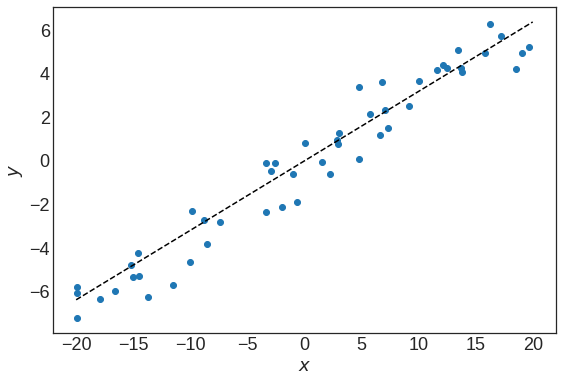

In [ ]:
## use these random x-values for the dataset
xmin = -20
xmax = 20
N_dataset = 50
X_train = np.sort(rng.uniform(low=xmin, high=xmax, size=N_dataset))

## use these evenly spaced x-values to evaluate the true model f(x)
X_range = np.linspace(xmin, xmax, 500)

## your answer here
def ftrue(x):
    return x/np.pi
    #3 * x * np.sqrt(np.abs(np.sin(x/2)))

y_train = ftrue(X_train) + rng.normal(0, size=N_dataset)

fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X_train, y_train, label='noisy data')
plt.plot(X_range, ftrue(X_range), color='k', label=r'true model $f(x)$', linestyle='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
#plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/linear_regression.pdf')
plt.show()

In [ ]:
def fmodel(X, w, b):
    return w*X + b

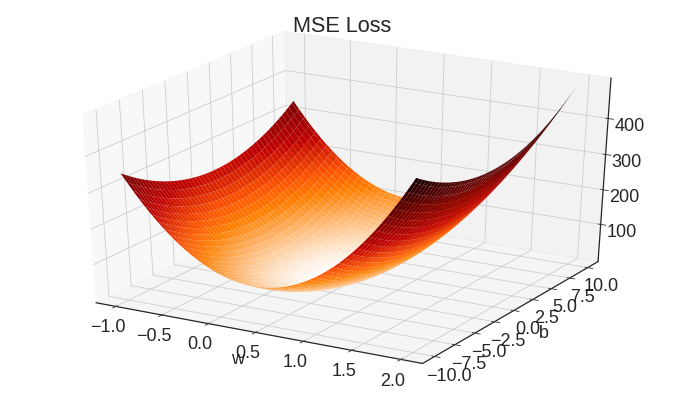

In [ ]:
# initialize figure 
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')

# build the grid
w = np.linspace(-1, 2, 100)
b = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w, b)
#Z = MSE_train(W, B)
Z = sum(np.square(y_train[i] - fmodel(X_train[i], W, B)) for i in range(len(X_train)))/len(X_train)

# plot the surface
surf = ax.plot_surface(W, B, Z, cmap=plt.cm.gist_heat_r)
plt.xlabel('w')
plt.ylabel('b')
plt.title('MSE Loss')
#fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/linear_regression_loss.pdf')
plt.show()

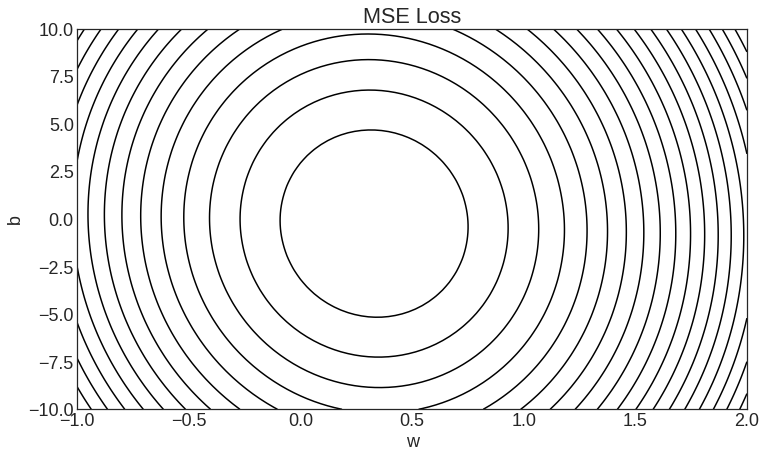

In [ ]:
fig = plt.figure(figsize=(12, 7))
contours = plt.contour(W, B, Z, 20, colors='black')
plt.xlabel('w')
plt.ylabel('b')
plt.title('MSE Loss')
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/linear_regression_loss_contour.pdf')
plt.show()